# Depth First Search - *Uninformed Search*
### Overview
This notebook implements and analyzes the Depth First Search (DFS) algorithm applied to maze solving. The goal is to find a path from the start to the finish in a maze represented as a 2D array.
### Depth First Search
- Depth First Search (DFS) explores the deepest node in the current frontier using a Last In First Out (LIFO) stack, where the most recently discovered node is expanded first.
- This implementation is a graph search version, which checks if a node has been previously expanded to prevent infinite loops.
- Search strategies in DFS and other methods primarily differ in how they determine the order of node expansion.
### Search Strategy
- Initializes the frontier using the initial state of the problem. Explore set = None.
- Take the last node in the queue of the stack and remove it from the frontier. 
- Check if the node is goal state. 
-   if it is, return solution path 
-   if not? continue
- Add the node to explored set
- Expand node and add resulting nodes to frontier
- Loop until frontier is empty or goal is found. 

### Steps:
1. **Convert the maze into a 2D Array**: Load maze data and convert it to integer format for processing.
2. **Implementing DFS**: Use a custom stack class to manage the nodes during the search process.
3. **Visualizing the Path**: Use matplotlib to illustrate the start, the path, and the goal within the maze.




# Implementing Depth First Search

In [1]:
# import the modules creates
# These come from the source_code file
import matplotlib.pyplot as plt
import numpy as np
from source_code.Helpers import string_to_int_array

# Load and Prepare Maze Data
1. Load the maze data and convert it to a usable format.
2. Find the starting state (2)
3. Find the end state (9) 

In [2]:
# take the string maze, load it to text with numpy
# Convert string type to int
maze_array_string = np.loadtxt('/Users/calebcougle/PycharmProjects/CAI104_COUGLE_A3/Mazes/a3maze.txt', dtype='str', delimiter=",")
maze = string_to_int_array(maze_array_string)

# The output is a 2D numpy array 
print(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 9 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [3]:
def find_start(maze):
    for i, row in enumerate(maze):
        for j, value in enumerate(row):
            if value == 2:  # Check for integer 2
                return (i, j)
    return None

def find_goal(maze):
    for i, row in enumerate(maze):
        for j, value in enumerate(row):
            if value == 9:  # Check for integer 2
                return (i, j)
    return None

In [4]:
goal_point = find_goal(maze)
start_point = find_start(maze)
print("Start point:",start_point,"\nGoal:",find_goal(maze))

Start point: (2, 2) 
Goal: (4, 20)


# Stack Class Definition
- A stack class is used to act as the LIFO queue. 
- Define a class that stores the frontier
- The stack stores the frontier or 'discovered' nodes that are *yet to be explored*.
- Methods within the class `stack` perform operations on the queue according to the DFS *search strategy* which is `Last in First Out` or `Stack` queue, which takes the newest node from the queue: 
-       Pop() 
-       Is_Empty()
-       Push()
(Russell & Norvig, 2016)

In [5]:
# Code based on (Andrews, 2023). 
class Stack:

    # constructor method
    def __init__(self):
        self.items = []

    # check if stack is empty
    def is_empty(self):
        return not self.items #<-- so as not to return bool

    # add items to the list
    def push(self, item):
        self.items.append(item)

    # removes the last item and returns the value
    def pop(self):
        return self.items.pop()

    # shows list item in list
    def peek(self):
        return self.items[-1]

    # size of list
    def size(self):
        return len(self.items)

    # turns obj into string
    def __str__(self):
        return str(self.items)

# Depth First Search (DFS) Implementation

- **Function Definition**: The `dfs()` function implements the depth-first search algorithm, utilizing methods from the `Stack` class to manage nodes during the search.
- **Initial State**: The starting node (`start`) is pushed onto the stack, as identified in previous functions.
- **Predecessors Dictionary**: The `predecessors{}` dictionary functions similarly to an explored list; it records node traversal and returns the solution path when the goal is found.
- **Current Node**: The `current_cell`, analogous to the current node, is the most recently added node on the stack, retrieved using the `Stack.pop()` method.
- **Expanding Frontier**: The frontier expands as the nested `for` loop iterates over directions, pushing neighbors onto the stack. Neighbors are discovered by adding the directional offset to the current node's array index. *Example:* Turn Right = `current_column + 1`.
- **Dead End Handling**: The `is_legal_pos()` function checks for dead ends, walls, and maze boundaries, ensuring movements are within the permissible range.
- **Goal Check & Solution Path**: If the current node is the goal, the `get_path()` function is invoked to backtrack through the `predecessors` dictionary and construct the path from the start to the goal.


In [6]:
# Import necessary functions from the helpers module
from Helpers import get_path, is_legal_pos, offsets

# Code based on (Andrews, 2023)
def dfs(maze, start, goal):
    # Initialize a stack and push the start position
    stack = Stack()
    stack.push(start)
    # Track the path taken using a dictionary with start point having no predecessor
    predecessors = {start: None}

    # Loop until the stack is empty
    
    while not stack.is_empty():
        # Pop the top cell from the stack
        current_cell = stack.pop()
        # If the current cell is the goal, return the path from start to goal
        if current_cell == goal:
            return get_path(predecessors, start, goal)
        # Explore each possible direction
        for direction in ["up", "right", "down", "left"]:
            # Calculate the neighbour's position based on current direction
            row_offset, col_offset = offsets[direction]
            neighbour = (current_cell[0] + row_offset, current_cell[1] + col_offset)
            # If the move is legal and the neighbour hasn't been visited
            if is_legal_pos(maze, neighbour) and neighbour not in predecessors:
                # Push the valid neighbour into the stack and mark its predecessor
                stack.push(neighbour)
                predecessors[neighbour] = current_cell
    # If no path is found, return None
    return None

In [7]:
# Run the DFS with the loaded maze, startpoint and goal point
path = dfs(maze, start_point, goal_point)
print(path)


[(2, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 10), (10, 11), (10, 12), (9, 12), (8, 12), (8, 11), (7, 11), (7, 10), (6, 10), (5, 10), (5, 11), (5, 12), (4, 12), (3, 12), (3, 11), (3, 10), (2, 10), (1, 10), (1, 11), (1, 12), (1, 13), (2, 13), (2, 14), (3, 14), (3, 15), (3, 16), (2, 16), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (2, 22), (3, 22), (4, 22), (5, 22), (6, 22), (7, 22), (8, 22), (9, 22), (10, 22), (10, 21), (10, 20), (10, 19), (10, 18), (9, 18), (8, 18), (8, 19), (8, 20), (7, 20), (6, 20), (6, 19), (6, 18), (5, 18), (4, 18), (4, 19), (4, 20)]


# Visualize the Path
- Run the DFS algorithm and visualize the results using MatplotLip.
- The function `update_maze_with_path()` plots the path on the maze as 4 

In [8]:
from matplotlib.colors import ListedColormap, Normalize

def plot_maze(maze, title="Maze"):
    colors = ['#F5F5F5', '#32424A', '#801515', '#27566B', '#55AA55']  # Background, walls, start, end, path
    cmap = ListedColormap(colors)
    norm = Normalize(vmin=0, vmax=len(colors) - 1)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze, cmap=cmap, norm=norm)
    ax.set_title(title)
    ax.set_axis_off()
    plt.show()


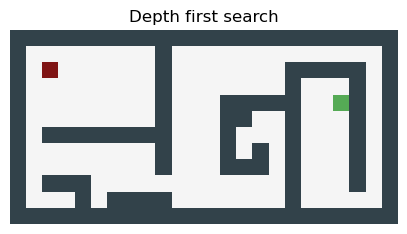

In [9]:
plot_maze(maze, "Depth first search")

In [10]:
def update_maze_with_path(maze, path):
    for position in path:
        maze[position[0], position[1]] = 4  # Mark path positions with 4
    return maze

In [11]:
def plot_path(maze, start, goal, path):
    if start:
        # path = dfs(maze, start, goal)  # Ensure 'maze' is used, which should be the integer array
        if path:
            updated_maze = update_maze_with_path(maze.copy(), path)
            plot_maze(updated_maze, "Depth first search: Solution path")
            print("Path:", path)
        else:
            print("No path found.")
    else:
        print("No start point found.")

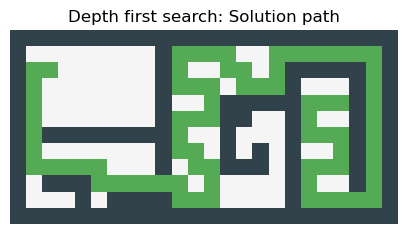

Path: [(2, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 10), (10, 11), (10, 12), (9, 12), (8, 12), (8, 11), (7, 11), (7, 10), (6, 10), (5, 10), (5, 11), (5, 12), (4, 12), (3, 12), (3, 11), (3, 10), (2, 10), (1, 10), (1, 11), (1, 12), (1, 13), (2, 13), (2, 14), (3, 14), (3, 15), (3, 16), (2, 16), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (2, 22), (3, 22), (4, 22), (5, 22), (6, 22), (7, 22), (8, 22), (9, 22), (10, 22), (10, 21), (10, 20), (10, 19), (10, 18), (9, 18), (8, 18), (8, 19), (8, 20), (7, 20), (6, 20), (6, 19), (6, 18), (5, 18), (4, 18), (4, 19), (4, 20)]


In [12]:
plot_path(maze, start_point, goal_point, path)